<!-- omit in toc -->
# 1. Understanding Returns and Assessing Risks with Value at Risk

This guide simplifies the understanding of investment returns and risk management. It starts with how to calculate and interpret percentage and compound returns, then explains monthly and annualized returns. The focus then shifts to understanding and measuring volatility and risk, including practical Python examples. It covers how to assess investment risks and returns using the Sharpe Ratio and real-world data, and introduces concepts like skewness, kurtosis, Value at Risk (VaR), and Conditional Value at Risk (CVaR). These tools help predict potential investment losses and provide a solid foundation for anyone looking to understand the essentials of financial risk management.

**This section utilizes Python modules to demonstrate the core concepts of Returns and Risks with Value at Risk**

In [1]:
# Standard libraries for data handling and numerical operations
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations

# Libraries for plotting and visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Import the font manager from matplotlib for managing fonts
import matplotlib.font_manager as font_manager

import seaborn as sns  # For advanced visualization styles

# Additional libraries for statistical analysis and optimization
import scipy.stats  # For statistical functions
from scipy.optimize import minimize  # For optimization functions

# Libraries for fetching financial data and handling date/time
import yfinance as yf  # For fetching financial data using yfinance
from pandas_datareader import data  # For fetching financial data
from datetime import datetime  # For handling date and time objects

# Import tabulate for creating tables
from tabulate import tabulate

# Custom toolkit for portfolio optimization
import sys
sys.path.append("../")  # Adding the toolkit's directory to system path
import PortfolioOptimizationKit as pok  # Custom toolkit for portfolio optimization

# Setting the plot style for visual consistency
sns.set_style("dark")  # Setting the plot style for Seaborn

In [2]:
# This line loads the autoreload extension in Jupyter.
# Autoreload helps automatically reload imported modules before executing code,
# ensuring that changes in the modules are reflected without restarting the kernel.
%load_ext autoreload

# This line configures the autoreload extension to reload all modules (not just those listed in %aimport)
# every time code is executed. '2' is the mode of autoreload that ensures this behavior.
%autoreload 2

# This line sets up the Jupyter notebook to display matplotlib plots inline.
# This means that generated plots will appear directly below the code cell that produced them.
%matplotlib inline

In [3]:
# Define the relative paths to the font files from the current working directory
montserrat_font_path = "../toolbox/font/Montserrat-ExtraBold.ttf"
paytone_font_path = "../toolbox/font/PaytoneOne.ttf"
sourcesanspro_font_path = "../toolbox/font/SourceSansProSemiBold.ttf"

# Set the Montserrat-ExtraBold font properties
montserrat_font = font_manager.FontProperties(fname=montserrat_font_path, size=12)

# Set the PaytoneOne font properties
paytone_font = font_manager.FontProperties(fname=paytone_font_path, size=11)

# Set the SourceSansPro font properties
sourcesanspro_font = font_manager.FontProperties(fname=sourcesanspro_font_path, size=10)

<a id="analyzing-returns"></a>

## Analyzing Returns

<a id="percentage-returns-explained"></a>

### Percentage Returns Explained

**`Percentage Returns Explained`**: Percentage return measures the financial gain or loss between two time points, $t$ and $t+1$. It's calculated as:

$$
P_{t+1} = P_{t} + R_{t,t+1}P_{t} = P_{t}(1+R_{t,t+1})
\qquad\Longrightarrow\qquad
R_{t,t+1} := \frac{P_{t+1} - P_t}{P_{t}} = \frac{P_{t+1}}{P_t} - 1.
$$

where $R_{t,t+1}$ is the return. For example, if a stock price rises from $100 to $104, the return is $R_{t,t+1}=104/100-1=0.04\$=4\%$

<a id="understanding-compound-returns"></a>

### Understanding Compound Returns

**`Compound Returns over Multiple Periods`**: The total return over several periods is not merely the sum of individual returns. Consider two consecutive time periods, with prices $P_0$ and $P_2$:

$$
P_1 = P_0 + R_{0,1}P_0
\qquad\text{and}\qquad
P_2 = P_1 + R_{1,2}P_1.
$$

So, the total return over two periods,

$$
R_{0,2} = \frac{P_2}{P_0} - 1
= 1 + R_{0,1}+R_{1,2}+R_{1,2}R_{0,1} - 1
= (1 + R_{0,1})(1 + R_{1,2}) - 1.
$$

In a timeframe $t$ to $t+k$, with $k > 1$, it generalizes to:

$$
R_{t,t+k} = (1+R)^{k} - 1.
\qquad\Longrightarrow\qquad
\prod_{i=0}^{k-1} (1+R_{t+i,t+i+1}) - 1
$$

<a id="practical-examples"></a>

#### Practical Examples

1. **Two-Day Stock Performance:** A stock increasing by 10% on day one and decreasing by 3% on day two has a compound return $R_{0,2} = (1 + 0.10)(1 - 0.03) - 1 = 6.7\%$, not simply $10\% - 3\%$.

2. **Annualized Return from Quarterly Returns:** A stock with consistent 1% quarterly returns yields an annualized return $R_{0,12} = (1 + 0.01)^4 - 1 = 4.06\%$.

<a id="monthly--annual-returns"></a>

## Monthly & Annual Returns

- **Monthly Returns:** Given monthly returns, the compound total return after two months $R_{total}$ is calculated. To find the equivalent monthly return $R_{pm}$, we solve $R_{total} = (1 + R_{pm})^2 - 1$, giving $R_{pm} = \sqrt{1 + R_{total}} - 1$.

- **Annualized Returns:** The annualized return $R_{py}$ is derived from monthly returns using $R_{py} = (1 + R_{pm})^{12} - 1$. For a series of returns, the formula becomes $R_{py} = (1 + R_{total})^{12/n} - 1$, where $n$ is the number of months.

### Generalizing Annualized Returns

For different time intervals (daily, weekly, monthly), the annualized return formula adjusts the power in the equation, with \( P_y \) representing the number of periods per year:

$$
R_{py} = (1 + R_{total})^{P_{y}/N_{\text{rets}}} - 1,
\quad \text{where} \quad
P_{y} =
\begin{cases}
&252 & \text{if daily}, \\
&52 & \text{if weekly}, \\
&12 & \text{if monthly}.
\end{cases}
$$

## Assessing Volatility and Risk

Volatility, a risk measure, is the standard deviation of asset returns:

$$
\sigma := \sqrt{  \frac{1}{N-1} \sum_{t} (R_t - \mu)^2  },
$$

where $\mu$ is the mean return. For monthly returns, annualized volatility is $\sigma_{ann} = \sigma_{m} \sqrt{12}$.

When dealing with **monthly return data**, the calculation of volatility usually focuses on the monthly scale, termed as **monthly volatility**. However, to understand the asset's risk profile over a longer period, such as a year, this monthly volatility needs to be scaled up. This process is necessary because volatility metrics derived from different time intervals are not directly comparable.

The conversion to **annualized volatility** $\sigma_{ann}$ involves a simple mathematical adjustment:

$$
\sigma_{ann} = \sigma_{p} \sqrt{p},
$$

where $\sigma_{p}$ is the volatility calculated over the shorter time period $p$, and $\sigma_{ann}$ is the annualized volatility. The variable $p$ represents the number of periods in a year.

For different time frames, the calculation adjusts as follows:

- Monthly Volatility $\sigma_{m}$: To annualize, use $\sigma_{ann} = \sigma_{m} \sqrt{12}$
- Weekly Volatility $\sigma_{w}$: Annualize by calculating $\sigma_{ann} = \sigma_{w} \sqrt{12}$
- Daily Volatility $\sigma_{d}$: Convert to annual volatility with $\sigma_{ann} = \sigma_{d} \sqrt{12}$

This method standardizes volatility to a yearly scale, allowing for a consistent and comparable measure of risk across different time frames.

### Zero Volatility Concept

**Question cosidering this scenario**: Asset A experiences a monthly decrease of 1% over a period of 12 months, while Asset B sees a consistent monthly increase of 1% during the same timeframe.

**Which asset exhibits greater volatility?**

Interestingly, the answer is that neither of them display any volatility (volatility is non-existent in both cases), as there are no real fluctuations; Asset A consistently decreases, whereas Asset B consistently increases.

In [6]:
# Creating two hypothetical assets
a = [100]
b = [100]
for i in range(12):
    a.append(a[-1] * 0.99)  # Asset A loses 1% each month
    b.append(b[-1] * 1.01)  # Asset B gains 1% each month

# Convert to DataFrame and calculate returns
asset_df = pd.DataFrame({"Asset A": a, "Asset B": b})
asset_df["Return A"] = asset_df["Asset A"].pct_change()
asset_df["Return B"] = asset_df["Asset B"].pct_change()

# Calculate Total Returns and Volatility
total_returns = (1 + asset_df[["Return A", "Return B"]].iloc[1:]).prod() - 1
volatility = asset_df[["Return A", "Return B"]].iloc[1:].std()

# Preparing data for tabulate
results = [
    ["Total Returns", total_returns["Return A"], total_returns["Return B"]],
    ["Volatility", volatility["Return A"], volatility["Return B"]]
]

# Formatting the results using tabulate
formatted_results = tabulate(results, headers=["Metric", "Asset A", "Asset B"], tablefmt="grid")

print(formatted_results)

+---------------+-------------+-----------+
| Metric        |     Asset A |   Asset B |
+===============+=============+===========+
| Total Returns | -0.113615   |  0.126825 |
+---------------+-------------+-----------+
| Volatility    |  6.6949e-17 |  0        |
+---------------+-------------+-----------+


#### Python Example: Analyzing Stock Data

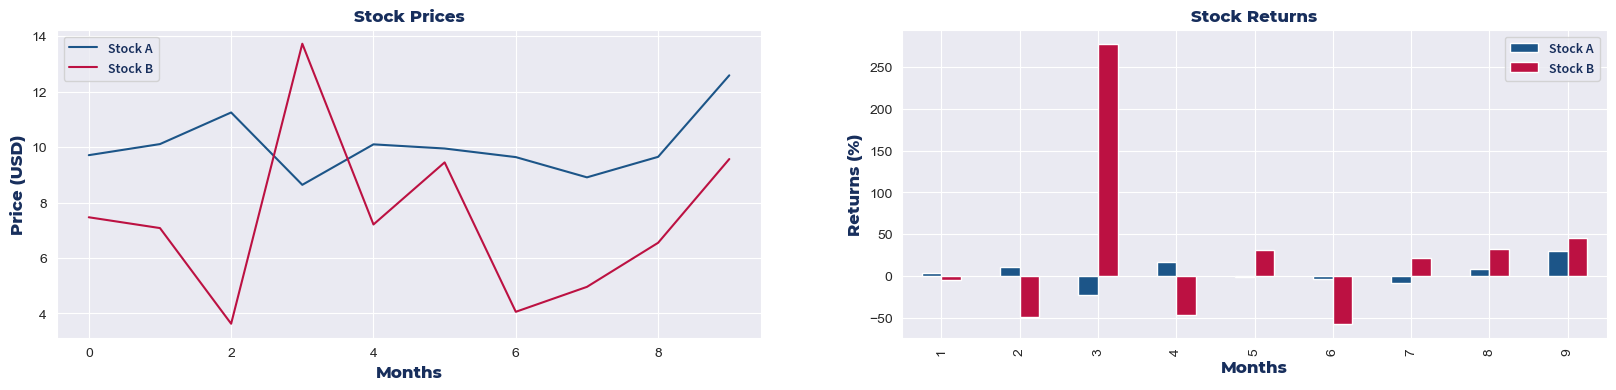

+-----------------------+-----------+-----------+
| Metric                |   Stock A |   Stock B |
+=======================+===========+===========+
| Total Returns (%)     |     29.00 |     28.55 |
+-----------------------+-----------+-----------+
| Mean Returns          |      0.04 |      0.28 |
+-----------------------+-----------+-----------+
| Volatility            |      0.15 |      1.02 |
+-----------------------+-----------+-----------+
| Annualized Volatility |      0.53 |      3.52 |
+-----------------------+-----------+-----------+


In [22]:
# In this analysis, we first generate synthetic stock prices for two stocks with distinct volatilities. 
# We then calculate their monthly returns and visualize the data. 
# The total compound returns, mean returns, and volatility are computed to understand the risk profile of each stock. 
# Finally, we calculate the Return on Risk (ROR) for each stock, which provides insights into the risk-adjusted performance of the investments. 
# This analysis suggests that Stock A offers a better return per unit of risk compared to Stock B, even though their total returns are similar.

# Example of generating stock prices
np.random.seed(51)
stocks = pd.DataFrame({"Stock A": np.random.normal(10, 1, size=10), 
                       "Stock B": np.random.normal(10, 5, size=10)})
stocks.index.name = "Months"
stocks = round(stocks, 2)

# Calculating returns
stocks["Stock A Rets"] = stocks["Stock A"] / stocks["Stock A"].shift(1) - 1
stocks["Stock B Rets"] = stocks["Stock B"] / stocks["Stock B"].shift(1) - 1
stocks = round(stocks, 2)

# Visualizing stock prices and returns
f, ax = plt.subplots(1, 2, figsize=(20, 4))

ax[0].plot(stocks.index, stocks["Stock A"], label="Stock A", color="#1C5588")
ax[0].plot(stocks.index, stocks["Stock B"], label="Stock B", color="#BC1142")
ax[0].set_title('Stock Prices', fontproperties=montserrat_font, color="#172E5C")
ax[0].set_xlabel("Months", fontproperties=montserrat_font, color="#172E5C")
ax[0].set_ylabel("Price (USD)", fontproperties=montserrat_font, color="#172E5C")
legend = ax[0].legend(prop=sourcesanspro_font)
for text in legend.get_texts():
    text.set_color("#172E5C")
ax[0].grid()

# Plot for stock returns as a histogram
(stocks[["Stock A Rets", "Stock B Rets"]].drop(index=0) * 100).plot.bar(ax=ax[1], color=["#1C5588", "#BC1142"])
ax[1].set_title('Stock Returns', fontproperties=montserrat_font, color="#172E5C")
ax[1].set_xlabel("Months", fontproperties=montserrat_font, color="#172E5C")
ax[1].set_ylabel("Returns (%)", fontproperties=montserrat_font, color="#172E5C")
legend = ax[1].legend(["Stock A", "Stock B"], prop=sourcesanspro_font)
for text in legend.get_texts():
    text.set_color("#172E5C")
ax[1].grid()

plt.show()

# Calculating total compound returns
total_ret = (1 + stocks[["Stock A Rets", "Stock B Rets"]]).prod() - 1

# Computing means and volatility
means = stocks[["Stock A Rets", "Stock B Rets"]].mean()
volatility = stocks[["Stock A Rets", "Stock B Rets"]].std()

# Annualizing volatility
ann_volatility = volatility * np.sqrt(12)

# Prepare data for tabulate
table_data = [
    ["Total Returns (%)", total_ret["Stock A Rets"] * 100, total_ret["Stock B Rets"] * 100],
    ["Mean Returns", means["Stock A Rets"], means["Stock B Rets"]],
    ["Volatility", volatility["Stock A Rets"], volatility["Stock B Rets"]],
    ["Annualized Volatility", ann_volatility["Stock A Rets"], ann_volatility["Stock B Rets"]]
]

# Using tabulate to format the table
table = tabulate(table_data, headers=["Metric", "Stock A", "Stock B"], tablefmt="grid", floatfmt=".2f")

print(table)

## Evaluating Return on Risk

Return on Risk (ROR) measures the reward per unit of risk, calculated as:

$$
\text{ROR} := \frac{\text{RETURN}}{\text{RISK}} = \frac{R}{\sigma},
$$

where $R$ is the total compound return. This metric helps compare investments with different risk profiles.

In [23]:
# This code segment computes the ROR for each stock, helping investors understand which stock offers better returns for the risk taken.

# Calculating Return on Risk
ROR = total_ret / volatility

# Prepare data for tabulate
ror_data = [
    ["Return on Risk", ROR["Stock A Rets"], ROR["Stock B Rets"]]
]

# Using tabulate to format the table
ror_table = tabulate(ror_data, headers=["Metric", "Stock A", "Stock B"], tablefmt="grid", floatfmt=".2f")

print(ror_table)

+----------------+-----------+-----------+
| Metric         |   Stock A |   Stock B |
+================+===========+===========+
| Return on Risk |      1.90 |      0.28 |
+----------------+-----------+-----------+


## Sharpe Ratio: Assessing Risk-Adjusted Returns

The Sharpe Ratio provides a more nuanced view of an investment's performance by considering the risk-free rate. This ratio adjusts the return on risk by accounting for the returns of a risk-free asset, like a US Treasury Bill. It's defined as the excess return per unit of risk:

$$
\lambda := \frac{E_R}{\sigma}
\quad\text{where}\quad
E_R := R - R_F,
$$

Here, $E_R$ is the excess return, calculated by subtracting the risk-free rate $R_F$ from the return $R$.

In [25]:
# This calculation demonstrates how the Sharpe Ratio can provide additional insights into the risk-adjusted performance of an investment.

# Assuming a 3% risk-free rate
risk_free_rate = 0.03 

# Calculate Excess Return
excess_return = total_ret - risk_free_rate

# Calculate Sharpe Ratio
sharpe_ratio = excess_return / volatility

# Prepare data for tabulate
sharpe_data = [
    ["Sharpe Ratio", sharpe_ratio["Stock A Rets"], sharpe_ratio["Stock B Rets"]]
]

# Using tabulate to format the table
sharpe_table = tabulate(sharpe_data, headers=["Metric", "Stock A", "Stock B"], tablefmt="grid", floatfmt=".2f")

print(sharpe_table)


+--------------+-----------+-----------+
| Metric       |   Stock A |   Stock B |
+==============+===========+===========+
| Sharpe Ratio |      1.71 |      0.25 |
+--------------+-----------+-----------+


## Illustrating Financial Concepts Using a Real-World Dataset

The performance of Small Cap and Large Cap US stocks using a dataset from Kaggle will be used to illustrate Financial Concepts. This dataset includes monthly returns from July 1926 to December 2018.

### Data Analysis

**Dataset Source**: **`PortfolioOptimizationKit.py`** to load data from a CSV file will be used. This dataset categorizes US stocks into Small Caps (bottom 10% by market capitalization) and Large Caps (top 10%).

**Data Visualization**: The code visualizes monthly returns for both categories. This step is crucial for a quick assessment of performance over time.

C:\Users\amine\AppData\Local\Temp\ipykernel_22988\2549286030.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_to_load, index_col=0, parse_dates=True, na_values=-99.99)


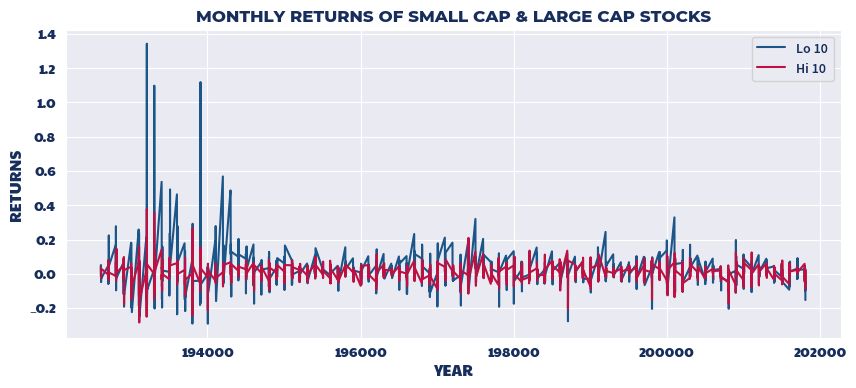

In [27]:
# Load the dataset
file_to_load = pok.path_to_data_folder() + "Portfolios_Formed_on_ME_monthly_EW.csv"
df = pd.read_csv(file_to_load, index_col=0, parse_dates=True, na_values=-99.99)

# Focus on Small Cap and Large Cap stocks
small_large_caps = df[["Lo 10", "Hi 10"]] / 100  # Dividing by 100 to convert to actual returns

# Plotting the returns
ax = small_large_caps.plot(grid=True, figsize=(10, 4), color={"Lo 10": "#1C5588", "Hi 10": "#BC1142"})
plt.title("MONTHLY RETURNS OF SMALL CAP & LARGE CAP STOCKS", fontproperties=montserrat_font, color="#172E5C")
plt.xlabel("YEAR", fontproperties=paytone_font, color="#172E5C")
plt.ylabel("RETURNS", fontproperties=paytone_font, color="#172E5C")

# Set PaytoneOne font for x and y axis labels
ax.xaxis.set_tick_params(labelsize=10, labelrotation=0, colors="#172E5C")
ax.yaxis.set_tick_params(labelsize=10, colors="#172E5C")
for label in ax.get_xticklabels():
    label.set_fontproperties(font_manager.FontProperties(fname=paytone_font_path, size=10))
for label in ax.get_yticklabels():
    label.set_fontproperties(font_manager.FontProperties(fname=paytone_font_path, size=10))

# Add legend and set text color to #172E5C
ax.legend(loc='upper left', frameon=False)
for text in ax.legend().get_texts():
    text.set_color("#172E5C")
    text.set_fontproperties(sourcesanspro_font)
plt.show()


### Calculating Volatility

**Monthly Volatility**: Using Python's standard deviation function to calculate the monthly volatility, a measure of how much stock returns vary from their average value.

**Annualizing Volatility**: Then scale up the monthly volatility to an annual figure. This conversion provides a broader view of the stocks' risk over a longer period.

In [28]:
# Calculating monthly volatility
monthly_volatility = small_large_caps.std()

# Annualizing the volatility
annualized_volatility = monthly_volatility * (12 ** 0.5)

# Create a list of tuples for the table
table_data = [
    ("Lo 10", monthly_volatility["Lo 10"], annualized_volatility["Lo 10"]),
    ("Hi 10", monthly_volatility["Hi 10"], annualized_volatility["Hi 10"])
]

# Define table headers
headers = ["Asset", "Monthly Volatility", "Annualized Volatility"]

# Format and print the table
table = tabulate(table_data, headers, tablefmt="grid")
print(table)

+---------+----------------------+-------------------------+
| Asset   |   Monthly Volatility |   Annualized Volatility |
+=========+======================+=========================+
| Lo 10   |            0.106288  |                0.368193 |
+---------+----------------------+-------------------------+
| Hi 10   |            0.0539003 |                0.186716 |
+---------+----------------------+-------------------------+


### Returns Analysis

**`Monthly & Annual Returns`**: Python code is used to calculate both monthly and annual returns. This step is key to understanding the long-term growth potential of the stocks.

In [29]:
# Number of months in the dataset
n_months = small_large_caps.shape[0]

# Total compound return
total_return = (1 + small_large_caps).prod() - 1

# Monthly and annualized returns
return_per_month = (1 + total_return) ** (1 / n_months) - 1
annualized_return = (1 + return_per_month) ** 12 - 1

# Create a list of tuples for the table
table_data = [
    ("Return per Month", return_per_month["Lo 10"], return_per_month["Hi 10"]),
    ("Annualized Return", annualized_return["Lo 10"], annualized_return["Hi 10"])
]

# Define table headers
headers = ["Metric", "Lo 10", "Hi 10"]

# Format and print the table
table = tabulate(table_data, headers, tablefmt="grid")
print("Return Metrics:")
print(table)

Return Metrics:
+-------------------+-----------+------------+
| Metric            |     Lo 10 |      Hi 10 |
+===================+===========+============+
| Return per Month  | 0.0129864 | 0.00742342 |
+-------------------+-----------+------------+
| Annualized Return | 0.167463  | 0.0928097  |
+-------------------+-----------+------------+


**`Risk-Adjusted Returns`**: **Return on Risk** and **Sharpe Ratio** are computed. These metrics help understanding which stocks offer better returns for their level of risk.

In [30]:
# Assuming a risk-free rate
risk_free_rate = 0.03

# Return on Risk and Sharpe Ratio
return_on_risk = annualized_return / annualized_volatility
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# Create a list of tuples for the table
risk_metrics_data = [
    ("Return on Risk", return_on_risk["Lo 10"], return_on_risk["Hi 10"]),
    ("Sharpe Ratio", sharpe_ratio["Lo 10"], sharpe_ratio["Hi 10"])
]

# Define table headers
risk_metrics_headers = ["Metric", "Lo 10", "Hi 10"]

# Format and print the table
risk_metrics_table = tabulate(risk_metrics_data, risk_metrics_headers, tablefmt="grid")
print("Risk Metrics:")
print(risk_metrics_table)

Risk Metrics:
+----------------+----------+----------+
| Metric         |    Lo 10 |    Hi 10 |
+================+==========+==========+
| Return on Risk | 0.454825 | 0.497063 |
+----------------+----------+----------+
| Sharpe Ratio   | 0.373346 | 0.336392 |
+----------------+----------+----------+


## Drawdown

**``Drawdown``** is a crucial metric in portfolio management, indicating the maximum loss from a peak to a trough of a portfolio, before a new peak is achieved. It's a measure of the most significant drop in asset value and is often used to assess the risk of a particular investment or portfolio.

To calculate the drawdown, these steps are needed:

Calculate the **`Wealth Index`**: This represents the value of a portfolio as it evolves over time, taking into account the compounding of returns.

Determine the **`Previous Peaks`**: Identify the highest value of the portfolio before each time point.

Calculate the **`Drawdown`**: It is the difference between the current wealth index and the previous peak, represented as a percentage of the previous peak.

The formula can be expressed as:

$$
\text{Drawdown at time } t = \frac{P_t - \max_{t' \in [0, t]} P_{t'}}{\max_{t' \in [0, t]} P_{t'}} \
$$

where $P_t$ is the portfolio value at time $t$, and $\max_{t' \in [0, t]} P_{t'}$ is the maximum portfolio value up to time $t$.

In extension, the **`Maximum Drawdown`** is a metric that quantifies the most substantial loss experienced from a peak to a trough of a portfolio before the emergence of a new peak. This metric is crucial for measuring the most severe decrease in value. The Maximum Drawdown formula is described as:

$$
\text{Max Drawdown} = \max_{t \in [0, T]} \left( \max_{t' \in [0, t]} P_{t'} - P_t \right) \
$$

where $T$ is the entire time period under consideration, $P_t$ is the portfolio value at time $t$, and $\max_{t' \in [0, t]} P_{t'}$ is the maximum portfolio value up to time $t$.

### Practical example

C:\Users\amine\AppData\Local\Temp\ipykernel_13016\1326992012.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rets = pd.read_csv(file_to_load, index_col=0, parse_dates=True, na_values=-99.99)


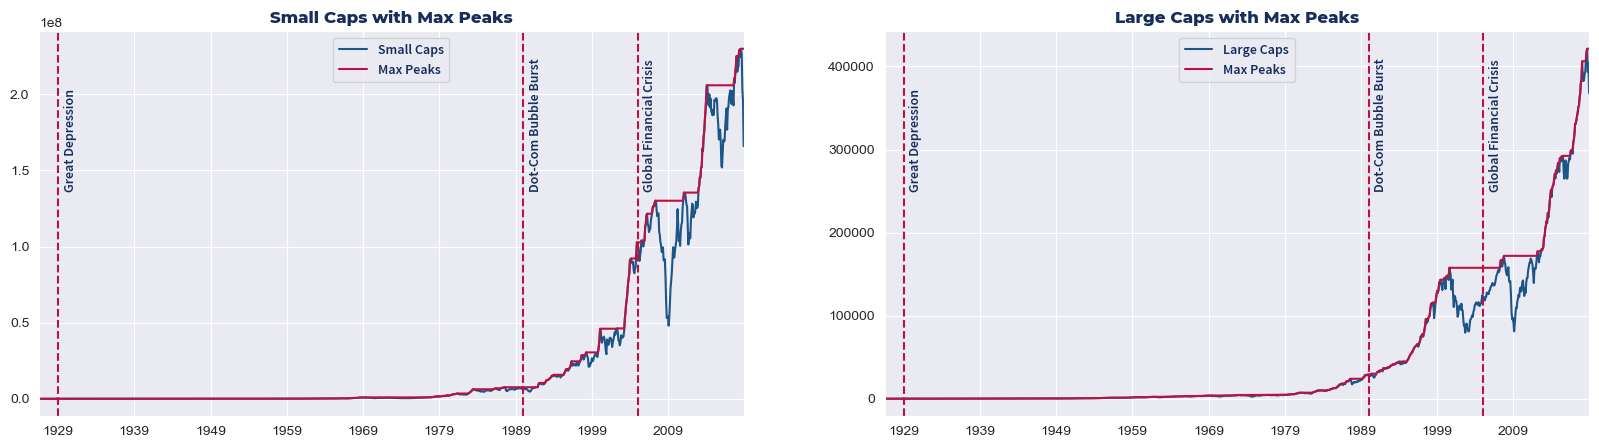

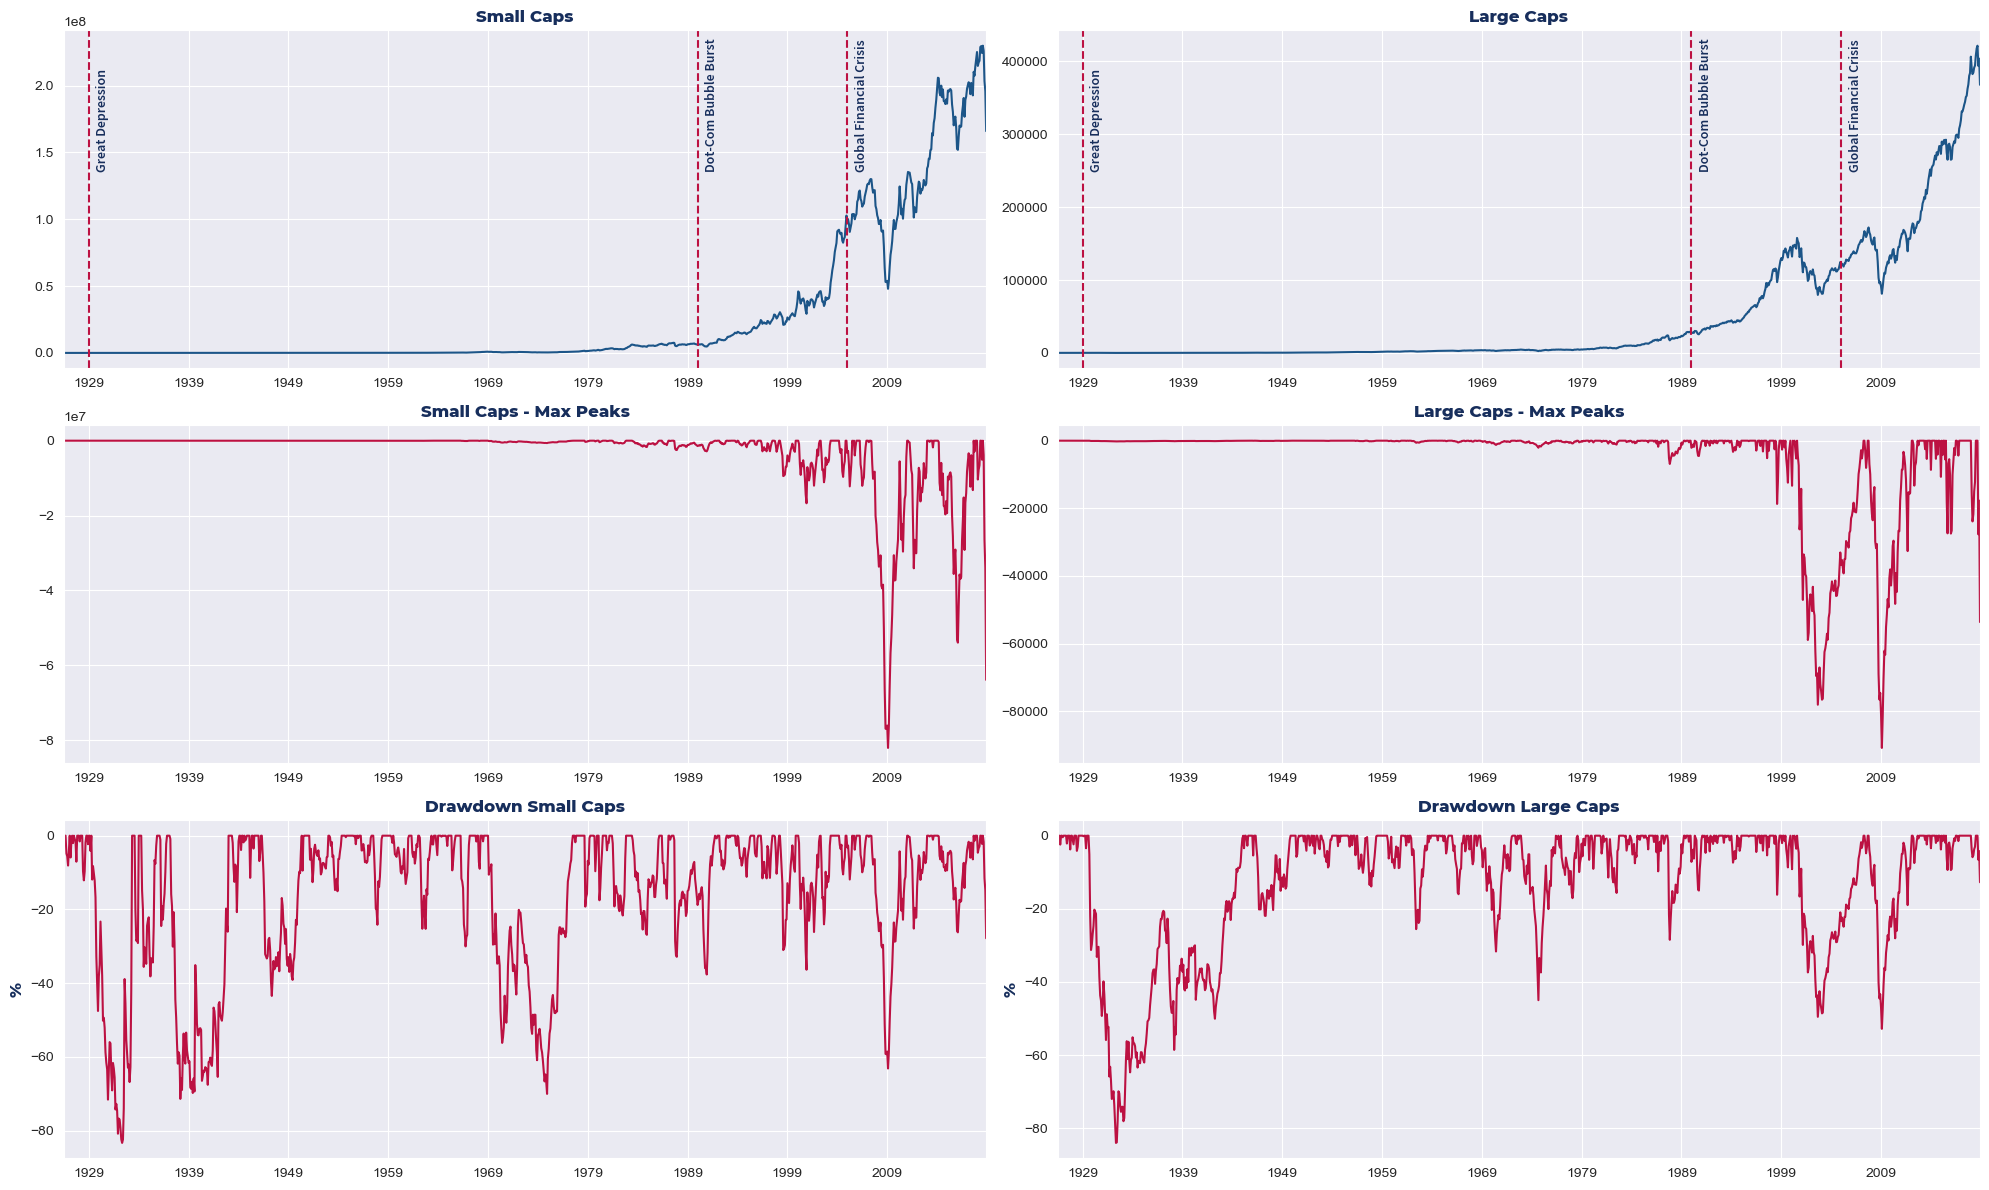

In [5]:
# Load the dataset
file_to_load = pok.path_to_data_folder() + "Portfolios_Formed_on_ME_monthly_EW.csv"
rets = pd.read_csv(file_to_load, index_col=0, parse_dates=True, na_values=-99.99)

# Processing the data for Small Caps and Large Caps
rets = rets[["Lo 10", "Hi 10"]] / 100
rets.columns = ["Small Caps", "Large Caps"]
rets.index = pd.to_datetime(rets.index, format="%Y%m")

# Calculate the wealth index from the returns starting from an investment of $100
wealth_index = 100 * (1 + rets).cumprod()

# Calculate previous peaks and drawdown
previous_peaks = wealth_index.cummax()
drawdown = (wealth_index - previous_peaks) / previous_peaks

# Define crisis dates and descriptions
crisis_dates = {
    "1929 Crisis": pd.to_datetime("1929-01-01"),
    "Dot Com Crisis": pd.to_datetime("1990-01-01"),
    "Lehman Brothers Crisis": pd.to_datetime("2005-01-01")
}

crisis_descriptions = {
    "1929 Crisis": "Great Depression",
    "Dot Com Crisis": "Dot-Com Bubble Burst",
    "Lehman Brothers Crisis": "Global Financial Crisis"
}


# Create subplots
f, ax = plt.subplots(figsize=(20, 5), nrows=1, ncols=2)

# Plot of the wealth indices and previous peaks
wealth_index["Small Caps"].plot(grid=True, ax=ax[0], label="Small Caps", legend=True, color="#1C5588")
wealth_index["Large Caps"].plot(grid=True, ax=ax[1], label="Large Caps", legend=True, color="#1C5588")

previous_peaks = wealth_index.cummax()
previous_peaks["Small Caps"].plot(grid=True, ax=ax[0], label="Max Peaks", color="#BC1142", legend=True)
previous_peaks["Large Caps"].plot(grid=True, ax=ax[1], label="Max Peaks", color="#BC1142", legend=True)

# Annotate crisis points with vertical text and add a small space
for i, cap in enumerate(["Small Caps", "Large Caps"]):
    for crisis, date in crisis_dates.items():
        ax[i].axvline(x=date, color="#BC1142", linestyle="--")
        # Adjust the position of the text with a small offset for space
        offset = pd.Timedelta(weeks=40)
        text_x_position = date + offset
        ax[i].text(text_x_position, wealth_index[cap].max() * 0.6, crisis_descriptions[crisis], 
                   color="#172E5C", fontproperties=sourcesanspro_font, rotation=90)

# Customize the legends and titles
for i, cap in enumerate(["Small Caps", "Large Caps"]):
    ax[i].set_title(f"{cap} with Max Peaks", fontproperties=montserrat_font, color="#172E5C")
    legend = ax[i].legend()
    for text in legend.get_texts():
        text.set_color("#172E5C")
        text.set_fontproperties(sourcesanspro_font)

plt.show()


# Create subplots for wealth index and drawdown analysis
f, ax = plt.subplots(3, 2, figsize=(20, 12))

# Plot wealth indices and annotate crisis points with spaced vertical text
for i in range(2):
    cap = ["Small Caps", "Large Caps"][i]
    wealth_index[cap].plot(grid=True, ax=ax[0, i], color="#1C5588", title=cap)
    
    for crisis, date in crisis_dates.items():
        ax[0, i].axvline(x=date, color="#BC1142", linestyle="--")
        # Adjust the position of the text with a small offset for space
        offset = pd.Timedelta(weeks=40)  # adjust the number of weeks for suitable spacing
        text_x_position = date + offset
        ax[0, i].text(text_x_position, wealth_index[cap].max() * 0.6, crisis_descriptions[crisis], 
                      color="#172E5C", fontproperties=sourcesanspro_font, rotation=90)

# Plot differences from max peaks and drawdowns for Small Caps and Large Caps
for i in range(2):
    cap = ["Small Caps", "Large Caps"][i]
    
    # Plot differences from max peaks
    (wealth_index - previous_peaks)[cap].plot(grid=True, ax=ax[1, i], color="#BC1142")
    ax[1, i].set_title(f"{cap} - Max Peaks", fontproperties=montserrat_font, color="#172E5C")

    # Plot drawdowns
    (drawdown[cap] * 100).plot(grid=True, ax=ax[2, i], color="#BC1142")
    ax[2, i].set_title(f"Drawdown {cap}", fontproperties=montserrat_font, color="#172E5C")

    # Customize axes, legends, and titles
    for row in range(1, 3):
        ax[row, i].set_xlabel("", fontproperties=montserrat_font, color="#172E5C")
        ax[row, i].set_ylabel("%" if row == 2 else "", fontproperties=montserrat_font, color="#172E5C")

# Customize axes with font properties and colors
for row in range(3):
    for col in range(2):
        ax[row, col].set_title(ax[row, col].get_title(), fontproperties=montserrat_font, color="#172E5C")
        ax[row, col].set_xlabel("", fontproperties=montserrat_font, color="#172E5C")
        ax[row, col].set_ylabel("%" if row == 2 else "", fontproperties=montserrat_font, color="#172E5C")

plt.tight_layout()
plt.show()

In [22]:
max_drawdown = drawdown.min().round(2) * 100
date_max_drawdown = drawdown.idxmin()

# Organizing your data and headers
data = [['1929 crisis', f"{max_drawdown}%", date_max_drawdown]]
headers = ['Event', 'Max Drawdown', 'Date of Max Drawdown']

# Using tabulate to print the table
print(tabulate(data, headers=headers, tablefmt='grid'))

+-------------+--------------------+-------------------------+
| Event       | Max Drawdown       | Date of Max Drawdown    |
+=============+====================+=========================+
| 1929 crisis | Small Caps   -83.0 | Small Caps   1932-05-01 |
|             | Large Caps   -84.0 | Large Caps   1932-05-01 |
|             | dtype: float64%    | dtype: datetime64[ns]   |
+-------------+--------------------+-------------------------+


### Insights from Historical Crises

- 1929 Crisis:

    The Great Depression profoundly affected both Small Caps and Large Caps, leading to severe wealth erosion.
    This case study serves as a reminder of the potential extreme risks in the stock market.

In [25]:
# max_drawdown = drawdown.min().round(2) * 100
# date_max_drawdown = drawdown.idxmin()

# Organizing your data and headers
data = [['1929 Crisis', f"{max_drawdown}%", date_max_drawdown]]
headers = ['Event', 'Max Drawdown', 'Date of Max Drawdown']

# Using tabulate to print the table
print(tabulate(data, headers=headers, tablefmt='grid'))

+-------------+--------------------+-------------------------+
| Event       | Max Drawdown       | Date of Max Drawdown    |
+=============+====================+=========================+
| 1929 crisis | Small Caps   -83.0 | Small Caps   1932-05-01 |
|             | Large Caps   -84.0 | Large Caps   1932-05-01 |
|             | dtype: float64%    | dtype: datetime64[ns]   |
+-------------+--------------------+-------------------------+


- Interpretation:
  - **Small Caps**: The maximum drawdown for Small Caps was $-83.0\%$. This means that at its worst point during the 1929 crisis, the value of Small Caps assets decreased to $17\%$ of their peak value before recovering.
  - **Large Caps**: Similarly, Large Caps had a maximum drawdown of -84.0%. This indicates that Large Caps assets fell to 16% of their peak value at the lowest point of the crisis.
  - Both Small Caps and Large Caps experienced their maximum drawdown on May 1, 1932.

- Dot Com Crisis (1990-2005):

    Characterized by the bursting of the dot-com bubble, this period saw significant losses, particularly in technology-heavy Large Caps.
    Reflects the volatility and potential downside of tech-driven market booms.

In [26]:
min_drawdown_dotcom = drawdown["1990":"2005"].min().round(2) * 100
date_min_drawdown_dotcom = drawdown["1990":"2005"].idxmin()

# Creating a list of lists for the data
dotcom_data = [['Dot Com crisis', f"{min_drawdown_dotcom}%", date_min_drawdown_dotcom]]

# Defining headers
headers = ['Crisis', 'Max Drawdown (%)', 'Date of Max Drawdown']

# Printing the table using tabulate
print(tabulate(dotcom_data, headers=headers, tablefmt="grid"))

+----------------+--------------------+-------------------------+
| Crisis         | Max Drawdown (%)   | Date of Max Drawdown    |
+================+====================+=========================+
| Dot Com crisis | Small Caps   -38.0 | Small Caps   1990-12-01 |
|                | Large Caps   -50.0 | Large Caps   2002-09-01 |
|                | dtype: float64%    | dtype: datetime64[ns]   |
+----------------+--------------------+-------------------------+


- Interpretation:
  - **Small Caps**: Experienced a maximum drawdown of $-38.0\%$. This indicates that, at its lowest point during the Dot Com crisis, the value of Small Caps assets fell to $62\%$ of their peak value before recovering on December 1, 1990.
  - **Large Caps**: Had a maximum drawdown of $-50.0\%$. This means that Large Caps assets decreased to $-50.0\%$ of their peak value at the worst point of the crisis on September 1, 2002.

- Lehman Brothers Crisis (2005 Onwards):

    Triggered by the collapse of Lehman Brothers, this crisis led to a global financial meltdown.
    Highlights the interconnectedness of modern financial markets and the rapidity with which shocks can propagate.

In [27]:
min_drawdown_lehman = drawdown["2005":].min().round(2) * 100
date_min_drawdown_lehman = drawdown["2005":].idxmin()

# Creating a list of lists for the data
lehman_data = [['Lehman Brothers crisis', f"{min_drawdown_lehman}%", date_min_drawdown_lehman]]

# Defining headers
headers = ['Crisis', 'Max Drawdown (%)', 'Date of Max Drawdown']

# Printing the table using tabulate
print(tabulate(lehman_data, headers=headers, tablefmt="grid"))

+------------------------+--------------------+-------------------------+
| Crisis                 | Max Drawdown (%)   | Date of Max Drawdown    |
+========================+====================+=========================+
| Lehman Brothers crisis | Small Caps   -63.0 | Small Caps   2009-02-01 |
|                        | Large Caps   -53.0 | Large Caps   2009-02-01 |
|                        | dtype: float64%    | dtype: datetime64[ns]   |
+------------------------+--------------------+-------------------------+


- Interpretation:
  - **Small Caps**: Experienced a maximum drawdown of $-63.0\%$. This indicates that, at its lowest point during the Lehman Brothers crisis, the value of Small Caps assets decreased to $37\%$ of their peak value before recovering.
  - **Large Caps**: Had a maximum drawdown of $-53.0\%$. This means that Large Caps assets fell to $47\%$ of their peak value at the worst point of the crisis.
  - Both Small Caps and Large Caps experienced their maximum drawdown on February 1, 2009.

## Gaussian Density & Distribution

A Gaussian random variable $X$, characterized by a mean $\mu$ and $\sigma^2$ (notated as $X\sim N(\mu,\sigma^2$)), is characterized by the following:

- A **Density function**:

$$
f(x) := \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right),
$$

- And a Cumulative distribution function (CDF):

$$
F_X(x) := \mathbb{P}(X\leq x) = \int_{-\infty}^x f(t)dt = \Phi(x).
$$

Here, $\Phi(x)$ gives the probability that $X$ is less than or equal to $x$.

Where $\mu=0$, and $\sigma^2=1$, $X$ is considered as **standard Gaussian random variable**. This standardization simplifies many statistical calculations.

### Symmetry Property

For a standard normal random variable $X\sim N(0,1)$, it holds that:

$$
\Phi(x) = 1-\Phi(-x).
$$

This property reflects the symmetry of the standard normal distribution.

### Distribution of Negative Random Variable

The exponential function $\exp(-t^2/2)$ is symmetric (i.e., an even function). Therefore, for a standard normal random variable $X\sim N(0,1)$, the distribution of $-X$ is also $N(0,1)$. Mathematically:

$$
\mathbb{P}(-X\leq x) 
= \mathbb{P}(X\geq -x)
= 1-\mathbb{P}(X\leq -x)
= 1-\Phi(-x)
= \Phi(x)
= \mathbb{P}(X\leq x),
$$

confirming that the cumulative distribution function of $-X$ is identical tot hat of $X$:

$$
F_{-X}(x) = F_X(x).
$$

## Quantiles

Imagine a random variable $X$, and let's consider a number $\alpha$ that lies between 0 and 1 (i.e., $\alpha\in(0,1)$). The quantile of order $\alpha$, denoted as $\phi_\alpha\in\mathbb{R}$, is a value such that the probability of $X$ being less than or equal to $\phi_\alpha$ equals $\alpha$. Mathematically, it's defined as:

$$
\mathbb{P}(X\leq \phi_\alpha) = \alpha.
$$

- **Quantiles in a Standard Normal Distribution**:

For a standard normal distribution, where $X\sim N(0,1)$, the concept of quantiles becomes particularly interesting. If $\phi_\alpha$ is an $\alpha$-quantile of a standard normal distribution, it satisfies:

$$
\Phi(-\phi_\alpha)
= \mathbb{P}(X\leq - \phi_\alpha)
= \mathbb{P}(-X\leq - \phi_\alpha)
= \mathbb{P}(X\geq \phi_\alpha)
= 1 - \mathbb{P}(X\leq \phi_\alpha)
= 1 - \Phi(\phi_\alpha)
= 1 - \alpha
= \mathbb{P}(X\leq \phi_{1-\alpha})
= \Phi(\phi_{1-\alpha}),
$$

This leads to a useful identity:

$$
-\phi_\alpha = \phi_{1-\alpha}.
$$

In essence, this identity illustrates the symmetry of the standard normal distribution.

- **Symmetry in Probability**:

In a standard normal distribution, the probability of the variable lying within certain symmetric bounds is given by:

$$
\mathbb{P}(|X|\leq \phi_{1-\alpha/2})
= \mathbb{P}(-\phi_{1-\alpha/2} \leq X \leq \phi_{1-\alpha/2})
= \Phi(\phi_{1-\alpha/2}) - \Phi(\underbrace{ -\phi_{1-\alpha/2} }_{= \phi_{\alpha/2}})
= (1-\alpha/2) - (\alpha/2)
= 1-\alpha.
$$

This formula is useful for understanding the distribution of values around the mean in a normal distribution.

### Practical Application: Finding a Specific Quantile

For example, to determine the 0.9-quantile of a standard normal distribution (i.e., the value below which 90% of the data lies), let's look for $\phi_{0.9}$ such that:

$$
\phi_{0.9} = \Phi^{-1}(0.9).
$$

Using the **`norm.ppf()`** function from **`scipy.stats`**, which provides **`quantiles`** for the **`Gaussian distribution`**, we can calculate this value directly.

In [34]:
# Calculating the 0.9-quantile of a standard normal distribution
phi_0_9 = scipy.stats.norm.ppf(0.9, 0, 1)

# Double-checking by calculating the probability up to the quantile
probability_check = scipy.stats.norm.cdf(phi_0_9, 0, 1)

# Preparing data for tabulation
data = [
    ["0.9-quantile (phi_0.9)", "{:.4f}".format(phi_0_9)],
    ["Probability check for phi_0.9", "{:.4f}".format(probability_check)]
]

# Creating a table with headers
headers = ["Description", "Value"]

table = tabulate(data, headers=headers, tablefmt="grid")
print(table)

+-------------------------------+---------+
| Description                   |   Value |
+===============================+=========+
| 0.9-quantile (phi_0.9)        |  1.2816 |
+-------------------------------+---------+
| Probability check for phi_0.9 |  0.9    |
+-------------------------------+---------+


- Interpretation:
  - **0.9-Quantile of a Standard Normal Distribution**: "The 0.9-quantile (phi_0.9) of a standard normal distribution: 1.2816"
  - **Probability Check for the 0.9-Quantile**: "Probability check for phi_0.9: 0.9000"

These results confirm that the value of approximately 1.2816 is indeed the 0.9-quantile of a standard normal distribution. Additionally, the probability check verifies that the cumulative distribution function (CDF) up to this quantile is 0.9, as expected

## Exploring Skewness and Kurtosis in Financial Data

### Skewness: Assessing Asymmetry in Distributions

Skewness quantifies how asymmetrical a distribution is regarding its mean. It can be:

- **Positive**: Indicating a tail on the right side.

- **Negative**: Showing a tail on the left side.

Formally, skewness is defined using the third centered moment:

$$
S(X) := \frac{\mathbb{E}(X - \mathbb{E}(X)^3)}{\sigma^3},
$$

where $\sigma$ is the standard deviation of $X$.

### Kurtosis: Analyzing Tails and Outliers

Kurtosis measures the "tailedness" or concentration of outliers in a distribution. It's calculated as:

$$
K(X) := \frac{\mathbb{E}(X - \mathbb{E}(X)^4)}{\sigma^4},
$$

where $\sigma$ is the standard deviation of $X$.

A normal distribution has a kurtosis of 3. Thus, **`"excess kurtosis"`** is often computed as $K(X)−3$, offering a comparison to a normal distribution.

### Practical Analysis

Here's a practical demonstration using Python to understand skewness and kurtosis in financial datasets:

c:\Users\amine\bin\github-projects\Investment-Management-with-Python-and-Machine-Learning-Specialization\1-Introduction-to-Portfolio-Construction-and-Analysis-with-Python\notebooks\../..\PortfolioOptimizationKit.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rets = pd.read_csv(filepath, index_col=0, parse_dates=True, na_values=-99.99)


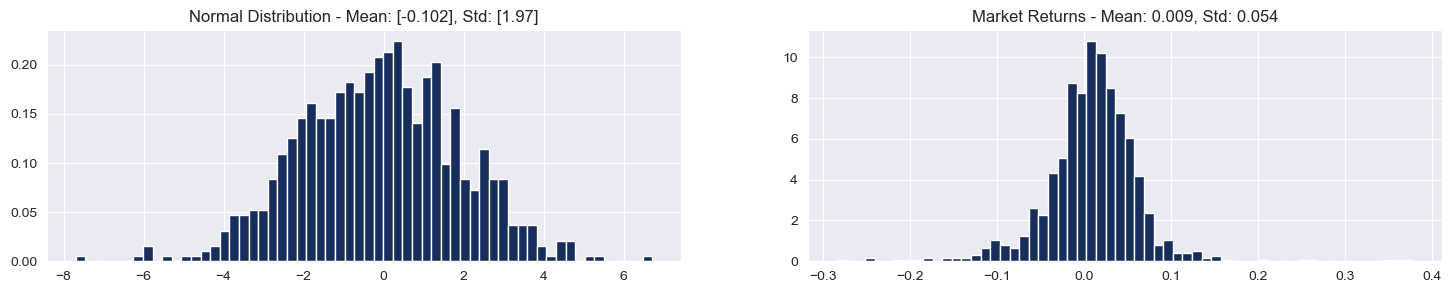

Skewness - Normal: [-0.05132651], Market: 0.233
Kurtosis - Normal: [3.1215247], Market: 10.695


C:\Users\amine\AppData\Local\Temp\ipykernel_7212\2503877943.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0, 0].axhline(y=skewness_normal[0], linestyle=":", color="red")
C:\Users\amine\AppData\Local\Temp\ipykernel_7212\2503877943.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1, 0].axhline(y=kurtosis_normal[0], linestyle=":", color="red")


<module 'matplotlib.pyplot' from 'c:\\Users\\amine\\bin\\miniconda3\\envs\\QuantFinanceHub\\lib\\site-packages\\matplotlib\\pyplot.py'>

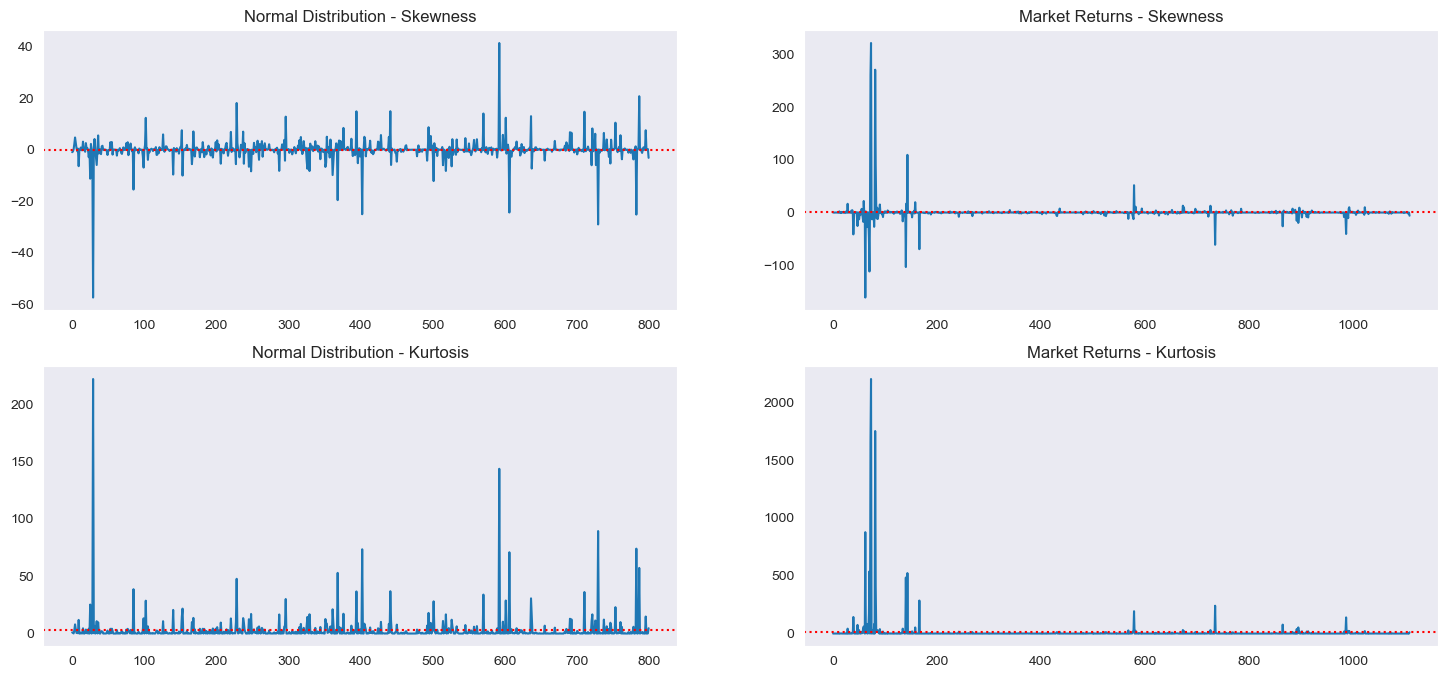

In [36]:
# Generate a normally distributed dataset
normal_data = pd.DataFrame({"A": np.random.normal(0, 2, size=800)})

# Retrieve returns from a financial dataset known to deviate from normality
market_returns = pok.get_ffme_returns()["Hi 10"]

# Plot histograms to visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 3))

axes[0].hist(normal_data.values, bins=60, density=True, color="#172E5C")
axes[0].set_title(f'Normal Distribution - Mean: {normal_data.mean().values.round(3)}, Std: {normal_data.std().values.round(3)}')
axes[0].grid()

axes[1].hist(market_returns.values, bins=60, density=True, color="#172E5C")
axes[1].set_title(f'Market Returns - Mean: {round(market_returns.mean(), 3)}, Std: {round(market_returns.std(), 3)}')
axes[1].grid()

plt.show()

# Calculating skewness and kurtosis
skewness_normal = ((normal_data - normal_data.mean())**3 / normal_data.std(ddof=0)**3).mean()
kurtosis_normal = ((normal_data - normal_data.mean())**4 / normal_data.std(ddof=0)**4).mean()

skewness_market = ((market_returns - market_returns.mean())**3 / market_returns.std(ddof=0)**3).mean()
kurtosis_market = ((market_returns - market_returns.mean())**4 / market_returns.std(ddof=0)**4).mean()

# Displaying the skewness and kurtosis
print(f"Skewness - Normal: {skewness_normal.values}, Market: {round(skewness_market, 3)}")
print(f"Kurtosis - Normal: {kurtosis_normal.values}, Market: {round(kurtosis_market, 3)}")

# Visual analysis of skewness and kurtosis
fig, axes = plt.subplots(2, 2, figsize=(18, 8))

axes[0, 0].plot(((normal_data - normal_data.mean())**3 / normal_data.std(ddof=0)**3).values)
axes[0, 0].axhline(y=skewness_normal[0], linestyle=":", color="red")
axes[0, 0].set_title('Normal Distribution - Skewness')

axes[1, 0].plot(((normal_data - normal_data.mean())**4 / normal_data.std(ddof=0)**4).values)
axes[1, 0].axhline(y=kurtosis_normal[0], linestyle=":", color="red")
axes[1, 0].set_title('Normal Distribution - Kurtosis')

axes[0, 1].plot(((market_returns - market_returns.mean())**3 / market_returns.std(ddof=0)**3).values)
axes[0, 1].axhline(y=skewness_market, linestyle=":", color="red")
axes[0, 1].set_title('Market Returns - Skewness')

axes[1, 1].plot(((market_returns - market_returns.mean())**4 / market_returns.std(ddof=0)**4).values)
axes[1, 1].axhline(y=kurtosis_market, linestyle=":", color="red")
axes[1, 1].set_title('Market Returns - Kurtosis')

plt

In this analysis, the normal distribution is expected to show skewness near zero and kurtosis close to three. In contrast, the market returns, deviating from normality, may exhibit different skewness and higher kurtosis values.

### Advanced Analysis with Hedge Fund Indices incorporation

We extend our analysis of skewness and kurtosis to a dataset involving hedge fund indices. This dataset provides a different perspective, often diverging from the standard characteristics of normal distributions.

In [7]:
# Load the hedge fund index data
hfi = pok.get_hfi_returns()
hfi.head(3)

# Initialize a DataFrame to store skewness and kurtosis values
hfi_skew_kurt = pd.DataFrame(columns=["Skewness", "Kurtosis"])

# Calculate skewness and kurtosis for each column in the hedge fund index data
hfi_skew_kurt["Skewness"] = hfi.aggregate(pok.skewness)
hfi_skew_kurt["Kurtosis"] = hfi.aggregate(pok.kurtosis)

# Display the calculated skewness and kurtosis
hfi_skew_kurt

c:\Users\amine\bin\github-projects\Investment-Management-with-Python-and-Machine-Learning-Specialization\1-Introduction-to-Portfolio-Construction-and-Analysis-with-Python\notebooks\../..\PortfolioOptimizationKit.py:31: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv(filepath, index_col=0, parse_dates=True, na_values=-99.99) / 100.0


,Skewness,Kurtosis
Convertible Arbitrage,-2.639592,23.280834
CTA Global,0.173699,2.952960
Distressed Securities,-1.300842,7.889983
Emerging Markets,-1.167067,9.250788
Equity Market Neutral,-2.124435,17.218555
Event Driven,-1.409154,8.035828
Fixed Income Arbitrage,-3.940320,29.842199
Global Macro,0.982922,5.741679
Long/Short Equity,-0.390227,4.523893
Merger Arbitrage,-1.320083,8.738950


When trying identifying Gaussian Distributions, **`CTA Global`**, shows skewness near zero and kurtosis close to three, indicating a possible normal distribution.

- **Using Jarque-Bera Test for Normality**

The Jarque-Bera test, a statistical test for normality, helps confirm if an index follows a Gaussian distribution.


In [41]:
# Jarque-Bera test on CTA Global
jb_result_cta_global = scipy.stats.jarque_bera(hfi["CTA Global"])
print("CTA Global:", jb_result_cta_global)

# Check normality using custom function in erk toolkit
is_normal_cta_global = pok.is_normal(hfi["CTA Global"])
print("Is CTA Global Normal?", is_normal_cta_global)

# Jarque-Bera test on Convertible Arbitrage
jb_result_conv_arb = scipy.stats.jarque_bera(hfi["Convertible Arbitrage"])
print("Convertible Arbitrage:", jb_result_conv_arb)

# Check normality for Convertible Arbitrage
is_normal_conv_arb = pok.is_normal(hfi["Convertible Arbitrage"])
print("Is Convertible Arbitrage Normal?", is_normal_conv_arb)

CTA Global: SignificanceResult(statistic=1.3467529104392222, pvalue=0.5099837302620385)
Is CTA Global Normal? True
Convertible Arbitrage: SignificanceResult(statistic=4812.703130094965, pvalue=0.0)
Is Convertible Arbitrage Normal? False


- **Normality Across Indices**

Finally, we examine the normality of all indices in the hedge fund dataset.

In [11]:
# Aggregate normality test across all indices
normality_test_results = hfi.aggregate(pok.is_normal)
print(normality_test_results)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool


This comprehensive analysis reveals that only the CTA Global index passes the normality test, suggesting it's the most normally distributed among the hedge fund indices.

## Understanding Downside Risk Measures

### Semivolatility: Focusing on Negative Fluctuations

**``Semivolatility``**, distinct from total volatility, zeroes in on the negative side of asset return fluctuations. In investment, the concern often isn't how much returns deviate when they're positive but rather how volatile they are when they're negative.

**``Semivolatility addresses this by measuring the standard deviation of only the subset of returns that are negative or below the mean``**. This measure is crucial for investors who prioritize safeguarding against losses over pursuing high returns. Mathematically, it's denoted as:

$$
\sigma_{semi} := \sqrt{ \frac{1}{N_{semi}} \sum_{R_t < 0} (R_t - \mu_{semi})^2 },
$$

where $\mu_{semi}$ represents the mean of the negative returns and $N_{semi}$ is their count.

> 📌 **Note**
>
> *This measure can be adapted to include returns below any chosen benchmark, such as the overall mean return.*

Calculating Semivolatility in Python
To compute semivolatility, filter the returns to only include the negative or below-mean values and then apply the standard deviation formula to this subset.

In [12]:
# Example: Calculating semivolatility for negative returns in Python
pok.semivolatility( hfi )
# negative_returns = returns[returns < 0]  # Extract negative returns
# mu_semi = negative_returns.mean()  # Mean of negative returns
# N_semi = negative_returns.count()  # Count of negative returns

# # Compute semivolatility
# sigma_semi = np.sqrt(np.sum((negative_returns - mu_semi)**2) / N_semi)
# print("Semivolatility:", sigma_semi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### Value at Risk (VaR): Gauging Maximum Expected Loss

**`Value at Risk`**, or **`VaR`**, quantifies the maximum anticipated loss over a defined period under normal market conditions. The confidence level for this measure usually lies between 0 and 1 and is often expressed as a percentage.

#### Conceptualizing VaR with a 99% Confidence Level

For instance, let's consider a VaR with a 99% confidence level (i.e., $\alpha = 0.99$). This implies the assessment of the highest potential loss for a month, excluding the worst 1% of potential outcomes. Essentially, it answers the question: "What's the maximum amount we could lose with 99% certainty in a month?"

Given a set of monthly returns like:

$$
R = (-4\%, +5\%, +2\%, -7\%, +1\%, +0.5\%, -2\%, -1\%, -2\%, +5\%).
$$

The task is to determine the 90% monthly VaR which implies two steps:

**`Exclude the 10% Worst Returns`**: This means removing the lowest 10% of returns, which, in a dataset of 10, equates to the single worst return, such as $-7\%$.

**`Identify the Next Worst Return`**: After excluding the worst, the next worst, in this case, is $-4%$. Therefore, the VaR is 4%.

It's important to note that even though the VaR is found to be $-4\%$, it's conventionally expressed as a positive figure, hence, $\text{VaR} = 4\%$.

From a mathematical standpoint, given a confidence level $\alpha$ within $(0,1)$, VaR is defined as:

$$
\text{VaR}_{\alpha} := - \text{inf}\{x \in \mathbb{R} : \mathbb{P}(R \leq x) \geq 1 - \alpha\} = - \text{inf}\{x \in \mathbb{R} : \mathbb{P}(R \geq x) \leq \alpha\},
$$

essentially making it the **$(1-\alpha)$-quantile**. it is aimed to find the number $\text{VaR}_\alpha$ such that:

$$
\mathbb{P}(R \leq -\text{VaR}_\alpha) = 1 - \alpha,
$$

indicating a $(1-\alpha)\%$ likelihood of a negative return equal to or worse than $-\text{VaR}_\alpha$.

In the illustrated example, a $90\%$ monthly VaR of $4\%$ signifies:

$$
0.04 = \text{VaR}_{0.9} = -\text{inf}\{x \in \mathbb{R} : \mathbb{P}(R \leq x) \geq 0.1\},
$$

which implies a 10% chance of losing over $4\%$ of the investment (experiencing returns lower than $-4\%$).

### Exploring Conditional Value at Risk (CVaR)

**`Conditional Value at Risk`**, **`CVaR`** is a measure used to assess the risk of investments. It predicts the average loss that could occur in the worst-case scenarios beyond a certain threshold set by Value at Risk (VaR). While VaR tells you how bad a loss might be on a very bad day, CVaR provides insight into the average losses expected if things go even worse than the VaR estimation. Essentially, CVaR calculates the mean of the tail end of the loss distribution, representing the expected loss in the worst $(1-\alpha)%$ of cases.

The formula is given by:

$$
\text{CVaR} := - \mathbb{E}( R | R<-\text{VaR}) = - \frac{\int_{-\infty}^{-\text{VaR}} t f_R(t)dt }{F_R(-\text{Var})},
$$

where $f_R$ represents the density function of the returns $R$, and $F_R$ is their cumulative distribution function. This formula effectively captures the expected losses beyond the VaR threshold, providing a more comprehensive view of potential downside risk.

#### Illustrative Example

Consider this set of monthly returns:

$$
R = (-4\%, +5\%, +2\%, -7\%, +1\%, +0.5\%, -2\%, -1\%, -2\%, +5\%).
$$

the objective is to determine the 80% monthly CVaR which implies three steps:

**`Exclude the Bottom 20% of Returns`**: Identify and remove the worst 20% of returns. For 10 returns, this means excluding the two worst, which are $-7%$ and $-4%$.

**`Identify the VaR`**: The next worst return after removing the bottom $20\%$ is $-2%$, setting the $80\%$ VaR at $2\%$.

**`Calculate the Average Beyond VaR`**: Consider the average of the returns worse than $-\text{VaR}_{0.8} = -2\%$, which in this case are $-7\%$ and $-4\%$. The average of these values gives $\text{CVaR}_{0.8} = - (-7\%-4\%)/2 = 5.5\%$.

This process illustrates how CVaR provides a more detailed risk assessment, taking into account the severity of losses beyond the VaR threshold.

## Estimating VaR and CVaR: A Comparative Overview

Several methods are available to estimate **`VaR (Value at Risk)`** and **`CVaR (Conditional Value at Risk)`**, each with its own approach and implications.

### Historical Approach (Non-Parametric)

The historical method is a straightforward, non-parametric approach to estimating VaR. It directly applies the concept of VaR as the $(1-\alpha)$-quantile of return distributions. Here's how it's typically implemented:

c:\Users\amine\bin\github-projects\Investment-Management-with-Python-and-Machine-Learning-Specialization\1-Introduction-to-Portfolio-Construction-and-Analysis-with-Python\notebooks\../..\PortfolioOptimizationKit.py:31: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv(filepath, index_col=0, parse_dates=True, na_values=-99.99) / 100.0


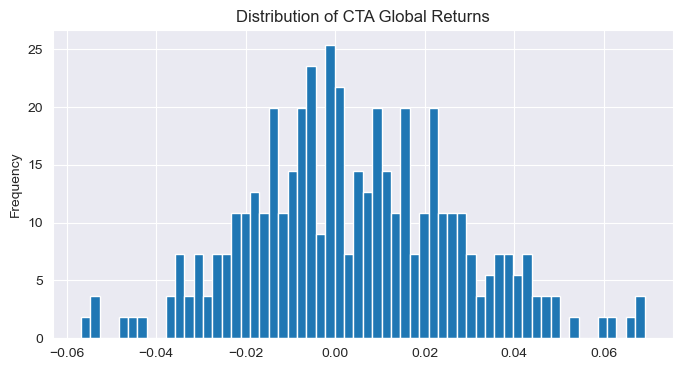

In [13]:
# Retrieve returns for the CTA Global index
hfi = pok.get_hfi_returns()

# Visualize the distribution of returns
ax = hfi["CTA Global"].plot.hist(figsize=(8,4), bins=60, density=True)
ax.set_title("Distribution of CTA Global Returns")
ax.grid()

Suppose you're interested in calculating the $90\%$, $95\%$, and $99\%$ monthly VaR. You'd set your confidence levels respectively at $1-\alpha = 0.01, 0.05,$ and $0.01$. The percentile method comes in handy for this calculation:

In [14]:
alpha = np.array([0.90, 0.95, 0.99])
level = 1 - alpha

# The percentile method requires the level in the range 0 to 100
VaRs = -np.percentile(hfi["CTA Global"], level*100)

print("90% VaR: {:.2f}%".format(VaRs[0] * 100))
print("95% VaR: {:.2f}%".format(VaRs[1] * 100))
print("99% VaR: {:.2f}%".format(VaRs[2] * 100))

90% VaR: 2.41%
95% VaR: 3.17%
99% VaR: 4.95%


This implies there's a $10\%$, $5\%$, and $1\%$ chance in any given month that losses will exceed approximately $2.4\%$, $3\%$, and $5\%$ respectively. Conversely, there's a $90\%$, $95\%$, and $99\%$ chance that losses won't surpass these thresholds within the same timeframe.

However, it's crucial to note that this method's accuracy depends on the timescale of the returns used. A VaR calculated with monthly returns might differ significantly from one calculated using weekly data, highlighting the sensitivity of the historical method to the chosen timescale.

### Parametric Approach (Gaussian)

In the **`Gaussian`** or **`parametric approach`**, **`returns are assumed to be normally distributed`**, a presumption which might not always hold true in real-world scenarios. If the returns $R$ follow a normal distribution $N(\mu,\sigma)$, with mean $\mu$ and volatility $\sigma$, we can use standardization to convert $R$ into a standard normal form, $X\sim N(0,1)$. The VaR is then derived from the quantile of the standardized normal distribution.

To determine the specific threshold $z_\alpha$ that satisfies the definition of $\text{VaR}_\alpha$ and quantiles, we need to solve for the value where the probability of returns falling below $z_\alpha$ equals $(1-\alpha)$:

$$
\mathbb{P}(R \leq z_\alpha) = 1-\alpha.
$$

This leads to a sequence of equalities:

$$
1-\alpha = \mathbb{P}(R \leq z_\alpha) = \mathbb{P}(\mu+ X\sigma \leq z_\alpha) 
= \mathbb{P}\left(X \leq \frac{z_\alpha-\mu}{\sigma}\right) 
= \Phi\left( \frac{z_\alpha-\mu}{\sigma} \right)
\qquad\Longrightarrow\qquad
z_\alpha = \mu + \Phi^{-1}(1-\alpha)\sigma 
$$

which, when solved, gives us the value $z_\alpha$:

Thus, we establish the formula for $\text{VaR}_\alpha$:

$$
\text{VaR}_\alpha = -\left(\;\mu + \Phi^{-1}(1-\alpha) \sigma\;\right),
$$

where $\Phi^{-1}(1-\alpha)$ the $(1-\alpha)$-quantile of the Gaussian distribution, and $\mu$ and $\sigma$ are the mean and volatility of the returns series, respectively, typically obtained using tools like **`norm.ppf`** python module.

In [15]:
# Compute the 95% monthly Gaussian VaR of the hedge fund indices 
alpha = 0.95
pok.var_gaussian( hfi, level=1-alpha)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

### Cornish-Fisher Modification (Semi-Parametric)

This approach modifies the Gaussian method using the Cornish-Fisher expansion, which adjusts the Gaussian quantiles to account for skewness and kurtosis of the return distribution. This makes it a better fit for non-Gaussian distributions:

$$
\tilde{z}_\alpha
= z_\alpha + \frac{1}{6}(z_\alpha^2 - 1)S
+\frac{1}{24}(z_\alpha^3 - 3 z_\alpha)(K-3)
-\frac{1}{36}(2z_\alpha^3 - 5 z_\alpha)S^2
$$

where $\tilde{z}_\alpha$, represents the $\alpha$-quantile of a non-Gaussian distribution (like the series of returns), while $S$ , and $K$ stand for its skewness and kurtosis, respectively. On the other hand, $z_\alpha$ refers to the $\alpha$-quantile of a standard Gaussian distribution. It's important to note that if the return series truly followed a Gaussian distribution, it'd be expected $S=0$ and $K=3$. Under these conditions, $\tilde{z}_\alpha$ would naturally align with $z_\alpha$, reflecting the Gaussian nature of the data.

### Comparison of VaR Methods

Comparing the VaR computed via different methods provides insights into the sensitivity and suitability of each approach under various market conditions:

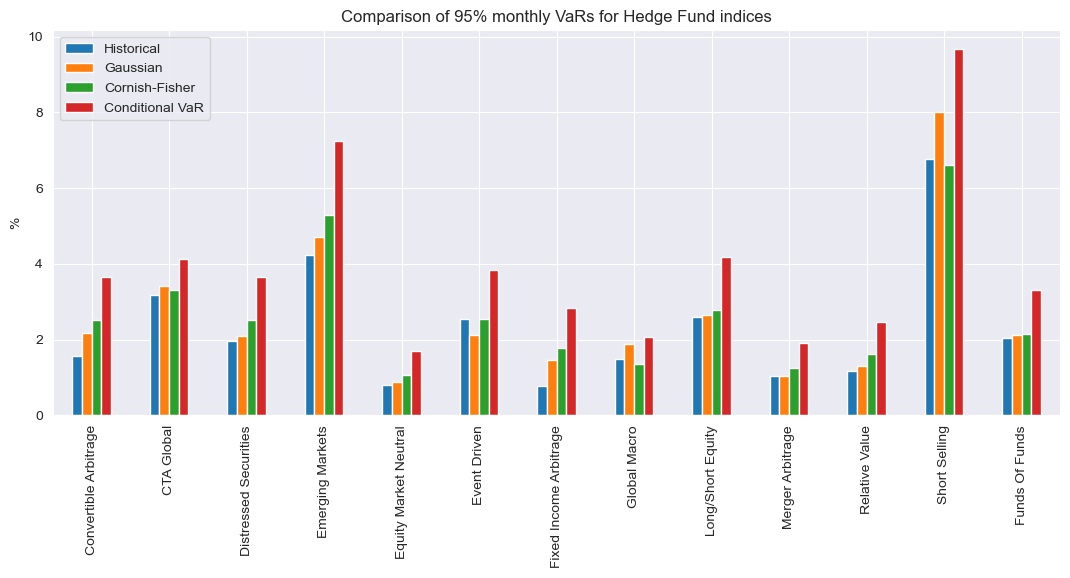

In [16]:
comparevars = pd.concat([pok.var_historic(hfi), pok.var_gaussian(hfi), pok.var_gaussian(hfi,cf=True), pok.cvar_historic(hfi)], axis=1)
comparevars.columns = ["Historical","Gaussian","Cornish-Fisher","Conditional VaR"]
(comparevars * 100).plot.bar(figsize=(13,5), grid=True, title="Comparison of 95% monthly VaRs for Hedge Fund indices")
plt.ylabel("%")
plt.show()

This visualization generally shows that Conditional VaR tends to estimate higher risk levels compared to the other methods, especially in tail events, while the historical method often presents the lowest VaR estimates. Each method has its place, depending on the risk profile, investment horizon, and market conditions an investor is dealing with.